<a href="https://colab.research.google.com/github/titaniumspy07/lab_test_3/blob/main/animal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive Bayes Classifier to classify animals in zoo dataset

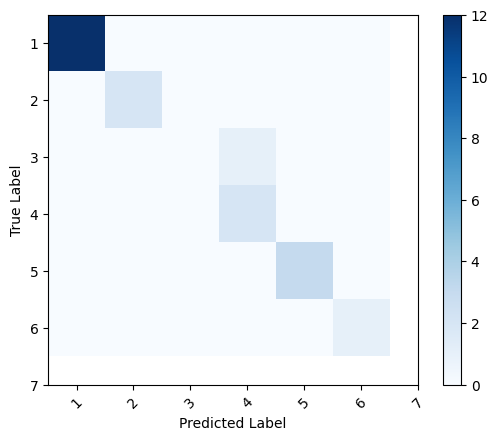

Accuracy: 0.95
Precision: 0.78
Recall: 0.83
Balanced Accuracy: 0.83


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score
import matplotlib.pyplot as plt

# importing data
zoo_data = pd.read_csv('https://raw.githubusercontent.com/titaniumspy07/lab_test_3/main/zoo.csv')

# train test set
X = zoo_data.iloc[:, 1:-1].values
y = zoo_data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# classifier instance and model fitting
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# prediction from model
y_pred = nb_classifier.predict(X_test)

# Plotting confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = range(len(set(y)))
plt.xticks(tick_marks, set(y), rotation=45)
plt.yticks(tick_marks, set(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')


K-means Clustering for the class dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# importing data
zoo_data = pd.read_csv('https://raw.githubusercontent.com/titaniumspy07/lab_test_3/main/zoo.csv')

# Extract the features for clustering
X = zoo_data.iloc[:, 1:-1].values

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

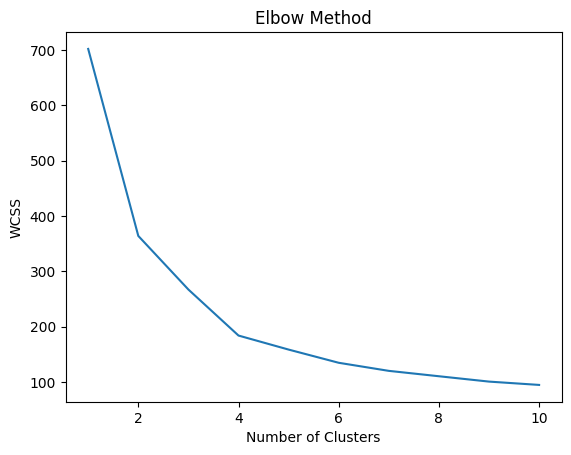

In [8]:
# Use the elbow method to determine the optimal number of clusters for KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Fit the KMeans clustering model with 4 clusters (optimal number of clusters)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


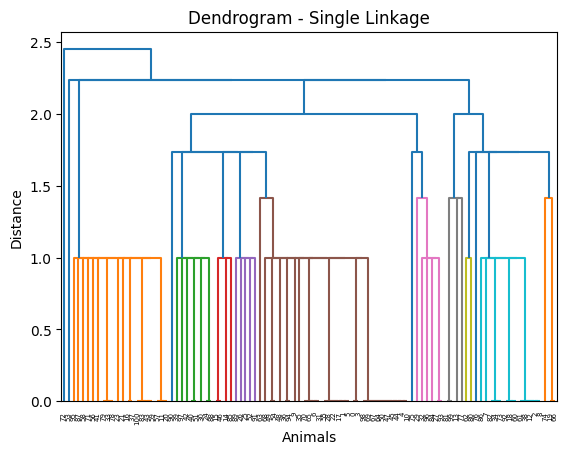

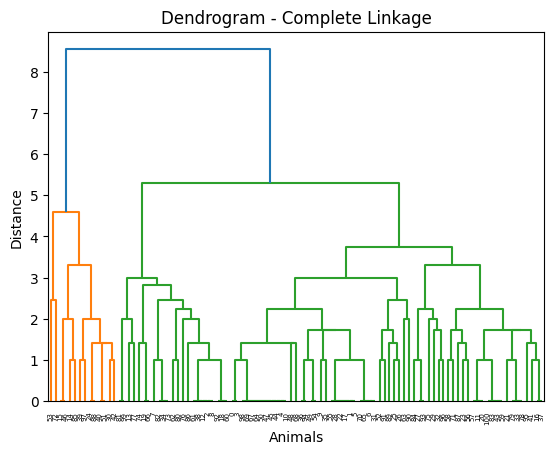

In [10]:
# Visualize the results using dendrograms with single and complete linkage methods
linkage_matrix = linkage(X, method='single')
dendrogram(linkage_matrix)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Animals')
plt.ylabel('Distance')
plt.show()

linkage_matrix = linkage(X, method='complete')
dendrogram(linkage_matrix)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Animals')
plt.ylabel('Distance')
plt.show()